# Support Vector Machines with Kernels: A Tutorial (ID: 24096581)

This notebook accompanies the formal tutorial on **Support Vector Machines (SVMs)**
with different kernel functions. We use the synthetic `make_moons` dataset to show
how kernel choice affects the decision boundary and classification performance.

- Dataset: `make_moons` (500 samples, noise = 0.25)
- Kernels: linear, polynomial (degree 3), radial basis function (RBF)
- Student ID: `24096581`


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ID = "24096581"
print("Notebook for Student ID:", ID)


Notebook for Student ID: 24096581


Shape of X: (500, 2)
Class distribution: [250 250]


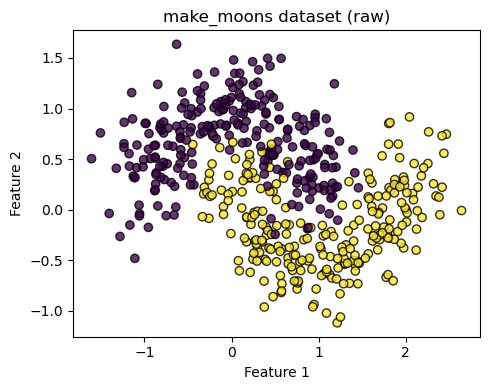

In [8]:
# 1. Generate the make_moons dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

# Visualise raw data
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", alpha=0.8)
plt.title("make_moons dataset (raw)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


In [9]:
# 2. Train / test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("Train shape:", X_train_s.shape)
print("Test shape:", X_test_s.shape)


Train shape: (350, 2)
Test shape: (150, 2)


In [10]:
# 3. Train SVM models with different kernels
kernels = {
    "linear": SVC(kernel="linear", random_state=42),
    "poly": SVC(kernel="poly", degree=3, gamma="scale", random_state=42),
    "rbf": SVC(kernel="rbf", gamma="scale", random_state=42),
}

models = {}
metrics = {}

for name, clf in kernels.items():
    clf.fit(X_train_s, y_train)
    models[name] = clf
    y_pred = clf.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Kernel: {name}")
    print("  Accuracy:", acc)
    print("  Confusion matrix:\n", cm)
    print("  Classification report:")
    print(classification_report(y_test, y_pred))
    metrics[name] = {"accuracy": acc, "confusion_matrix": cm}


Kernel: linear
  Accuracy: 0.84
  Confusion matrix:
 [[65 10]
 [14 61]]
  Classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.86      0.81      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150

Kernel: poly
  Accuracy: 0.84
  Confusion matrix:
 [[62 13]
 [11 64]]
  Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.83      0.85      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150

Kernel: rbf
  Accuracy: 0.9466666666666667
  Confusion matrix:
 [[73  2]
 [ 6 69]]
  Classification report:
              precision    recall  f1-score   

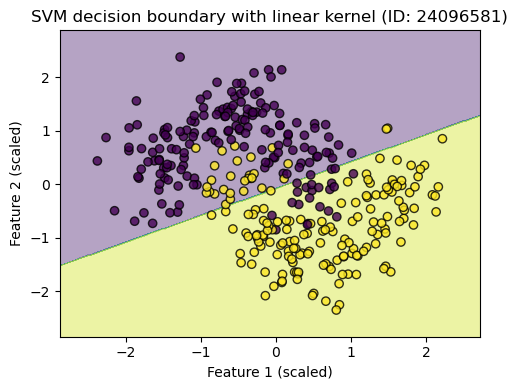

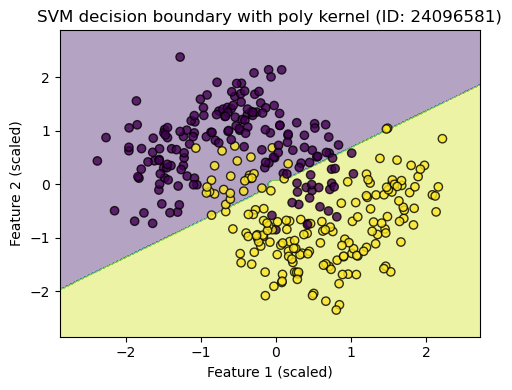

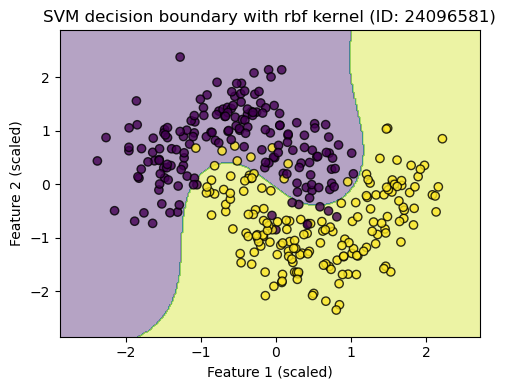

In [11]:
# 4. Helper to plot decision boundaries

def plot_decision_boundary(model, X_train_s, y_train, title):
    x_min, x_max = X_train_s[:, 0].min() - 0.5, X_train_s[:, 0].max() + 0.5
    y_min, y_max = X_train_s[:, 1].min() - 0.5, X_train_s[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train, edgecolor="k", alpha=0.8)
    plt.title(title + f" (ID: {ID})")
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.tight_layout()
    plt.show()

for name, model in models.items():
    plot_decision_boundary(
        model, X_train_s, y_train, f"SVM decision boundary with {name} kernel"
    )


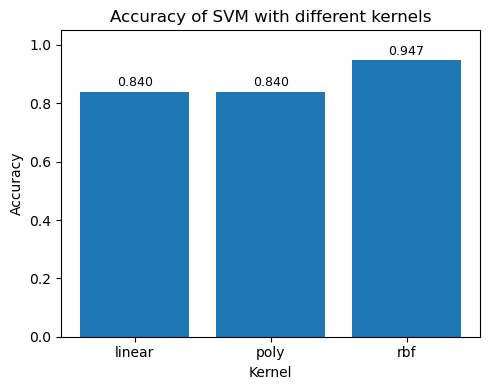

In [12]:
# 5. Compare accuracies across kernels
kernel_names = list(metrics.keys())
accuracies = [metrics[k]["accuracy"] for k in kernel_names]

plt.figure(figsize=(5, 4))
plt.bar(kernel_names, accuracies)
plt.ylim(0, 1.05)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha="center", va="bottom", fontsize=9)
plt.title("Accuracy of SVM with different kernels")
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.tight_layout()
plt.show()


## 6. Summary

In this notebook we:

1. Generated a non-linearly separable dataset using `make_moons`.
2. Standardised the features and created a train/test split.
3. Trained SVM classifiers with **linear**, **polynomial (degree 3)**, and **RBF** kernels.
4. Visualised decision boundaries to see how each kernel transforms the input space.
5. Compared classification accuracy across kernels.

For this dataset, the non-linear kernels (especially RBF) typically perform better than
the linear kernel, because the true decision boundary is curved. This neatly illustrates
the value of the **kernel trick** in SVMs.
